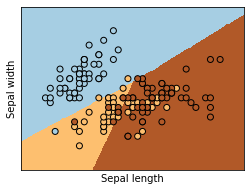

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn import datasets, linear_model


class LogisticRegression(object):
    def __init__(self, eta=0.001, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        self.w_ = np.ones(X.shape[1])

        for _ in range(self.n_iter):
            output = X.dot(self.w_)
            errors = y - self.sigmoid(output)
            self.w_ += self.eta * errors.T.dot(X)
            # print(sum(errors**2) / 2.0)
        return self

    def predict(self, X):
        output = np.insert(X, 0, 1, axis=1).dot(self.w_)
        return (self.sigmoid(output) + .5) // 1

    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))


class LogisticRegressionOVR(object):
    """One vs Rest"""

    def __init__(self, eta=0.001, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        self.w_ = []

        for i in np.unique(y):
            y_copy = [1 if c == i else 0 for c in y]
#             w = np.ones(X.shape[1])
            w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

            # print('training ', i)
            # counter = 0

            for _ in range(self.n_iter):
                output = X.dot(w)
                errors = y_copy - self.sigmoid(output)
                w += self.eta * errors.T.dot(X)
                
                # counter += 1
                # if counter // 10 == 0:
                #     print(sum(errors**2) / 2.0)
            self.w_.append((w, i))

        return self


    def predictOne(self, x):
        return max((x.dot(w), c) for w, c in self.w_)[1]

    def predict(self, X):
        return np.array([self.predictOne(i) for i in np.insert(X, 0, 1, axis=1)])
    
    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)

    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))
    
    def softmax(self, x):
        """ applies softmax to an input x"""
        e_x = np.exp(x)
        return e_x / e_x.sum()
    


def main():
    iris = datasets.load_iris()
    # X = iris.data[:100, :2]
    # y = iris.target[:100]
    X = iris.data[:, :2]
    y = iris.target
    logi = LogisticRegressionOVR()
    logi.fit(X, y)
    y_pred = logi.predict(X)
    print(y_pred)
    print("out of a total %d points : %d" % (X.shape[0],(y != y_pred).sum()))


# if __name__ == '__main__': main()

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

# logreg = linear_model.LogisticRegression(C=1e5)
logreg = LogisticRegressionOVR(n_iter=1000)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [68]:
logreg.w_

[(array([-0.15550334, -3.29867604,  5.72939301]), 0),
 (array([ 0.40531782,  0.66333248, -1.69824498]), 1),
 (array([-3.47518351,  1.50784398, -2.08277474]), 2)]

In [69]:
logreg.sigmoid(Y)

array([0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.73105858, 0.73105858, 0.73105858, 0.73105858, 0.73105858,
       0.73105858, 0.73105858, 0.73105858, 0.73105858, 0.73105858,
       0.73105858, 0.73105858, 0.73105858, 0.73105858, 0.73105858,
       0.73105858, 0.73105858, 0.73105858, 0.73105858, 0.73105858,
       0.73105858, 0.73105858, 0.73105858, 0.73105858, 0.73105

In [83]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X_train, X_temp, y_train, y_temp = \
    train_test_split(iris.data, iris.target, test_size=.4)
X_validation, X_test, y_validation, y_test = \
    train_test_split(X_temp, y_temp, test_size=.5)

logi = LogisticRegressionOVR(n_iter=1000).fit(X_train, y_train)
# logi = LogisticRegressionOVR(n_iter=1000).fit(X_validation, y_validation)

print(logi.score(X_train, y_train))
print(logi.score(X_validation, y_validation))

print(logi.score(iris.data,iris.target))

0.9666666666666667
0.9666666666666667
0.96


In [71]:
logi.softmax(y_validation)

array([0.02765425, 0.01017343, 0.01017343, 0.01017343, 0.07517204,
       0.02765425, 0.02765425, 0.02765425, 0.02765425, 0.07517204,
       0.01017343, 0.01017343, 0.01017343, 0.01017343, 0.07517204,
       0.07517204, 0.02765425, 0.02765425, 0.07517204, 0.02765425,
       0.02765425, 0.01017343, 0.01017343, 0.07517204, 0.02765425,
       0.01017343, 0.01017343, 0.01017343, 0.07517204, 0.07517204])

In [72]:
logi.sigmoid(y_train)

array([0.5       , 0.88079708, 0.73105858, 0.5       , 0.73105858,
       0.73105858, 0.73105858, 0.5       , 0.5       , 0.5       ,
       0.73105858, 0.88079708, 0.5       , 0.88079708, 0.73105858,
       0.88079708, 0.73105858, 0.88079708, 0.5       , 0.88079708,
       0.88079708, 0.88079708, 0.88079708, 0.73105858, 0.73105858,
       0.88079708, 0.5       , 0.5       , 0.88079708, 0.5       ,
       0.73105858, 0.73105858, 0.5       , 0.88079708, 0.5       ,
       0.73105858, 0.73105858, 0.73105858, 0.88079708, 0.5       ,
       0.88079708, 0.73105858, 0.73105858, 0.5       , 0.5       ,
       0.73105858, 0.73105858, 0.88079708, 0.88079708, 0.88079708,
       0.88079708, 0.73105858, 0.88079708, 0.73105858, 0.88079708,
       0.88079708, 0.88079708, 0.73105858, 0.5       , 0.73105858,
       0.88079708, 0.5       , 0.5       , 0.88079708, 0.88079708,
       0.73105858, 0.5       , 0.88079708, 0.5       , 0.88079708,
       0.5       , 0.88079708, 0.5       , 0.88079708, 0.73105

In [73]:
logi.w_
log_point = logi.w_
log_point = log_point[0][0]
log_point_2 = log_point
log_point_2
# log_point_2
len(X_test)
y_test.shape
# _test.reshape(5,6)
# log_point_2.shape

(30,)

In [78]:
# # z = test @ logi.w
# abd = np.array(aw1[:3][0])
# abd
# test[0]
# logi.w
# z = np.matmul(Y,abd)
z = np.dot(X_test.reshape(24,5),log_point_2.reshape(5,1))
# # type(abd)
log_point_2.reshape(5,1)
X_test
logi.w_
z

array([[  4.49937143],
       [-15.40562208],
       [  0.56391631],
       [ -4.86288056],
       [  4.57289856],
       [-17.64585561],
       [  3.76543905],
       [  3.92988144],
       [  1.93907706],
       [-15.99549514],
       [  0.58844353],
       [ -7.07248532],
       [ -1.48580866],
       [-12.03276119],
       [  2.45929474],
       [ -4.87645648],
       [  1.45433701],
       [-11.75730947],
       [  3.52730036],
       [ -7.97691521],
       [  0.59721115],
       [-11.84307291],
       [  0.86097461],
       [ -7.10450945]])

In [79]:
  def sigmoid(x):
        return 1.0 / (1 + np.exp(-x))
    
h = sigmoid(z)
h

array([[9.89006225e-01],
       [2.03902829e-07],
       [6.37358214e-01],
       [7.66892337e-03],
       [9.89777597e-01],
       [2.17021256e-08],
       [9.77366687e-01],
       [9.80732527e-01],
       [8.74250714e-01],
       [1.13043261e-07],
       [6.43007941e-01],
       [8.47403930e-04],
       [1.84551658e-01],
       [5.94614686e-06],
       [9.21238506e-01],
       [7.56629664e-03],
       [8.10665006e-01],
       [7.83180699e-06],
       [9.71454645e-01],
       [3.43178977e-04],
       [6.45018002e-01],
       [7.18812571e-06],
       [7.02864239e-01],
       [8.20718402e-04]])

In [81]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3